In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
class LinearModel(torch.nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = torch.nn.Linear(1, 1)

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

model = LinearModel()

In [3]:
next(model.parameters())

Parameter containing:
tensor([[-0.5171]], requires_grad=True)

In [4]:
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

In [5]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(10):
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [30]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizers = [('Adagrad', torch.optim.Adagrad(model.parameters(), lr=0.01)),
              ('Adam', torch.optim.Adam(model.parameters(), lr=0.01)),
              ('Adamax', torch.optim.Adamax(model.parameters(), lr=0.01)),
              ('ASGD', torch.optim.ASGD(model.parameters(), lr=0.01)),
              # ('LBFGS', torch.optim.LBFGS(model.parameters(), lr=0.01)),
              ('RMSprop', torch.optim.RMSprop(model.parameters(), lr=0.01)),
              ('Rprop', torch.optim.Rprop(model.parameters(), lr=0.01)),
              ('SGD', torch.optim.SGD(model.parameters(), lr=0.01))]
losses = {}
for (name, optimizer) in optimizers:
  losses[name] = []
  for epoch in range(10):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    losses[name].append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

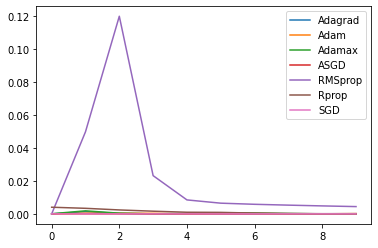

In [32]:
plt.plot(losses['Adagrad'], label='Adagrad')
plt.plot(losses['Adam'], label='Adam')
plt.plot(losses['Adamax'], label='Adamax')
plt.plot(losses['ASGD'], label='ASGD')
plt.plot(losses['RMSprop'], label='RMSprop')
plt.plot(losses['Rprop'], label='Rprop')
plt.plot(losses['SGD'], label='SGD')
plt.legend()
plt.savefig('optimizers.png', dpi=1000)